In [1]:
import pandas as pd
import itertools
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
import pickle

### Correlation based

(13, 5887)
18185750 1.0


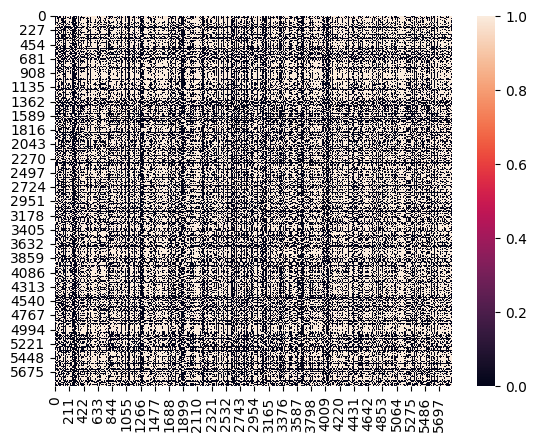

In [16]:
df = pd.read_csv("./huvec/cd_matrix_dA.csv")
X = df.values
print(X.shape)
skeleton = itertools.product(range(X.shape[1]), range(X.shape[1]-1)) 

# Correlation matrix with Permutation testing
#fig, (data_ax, corr_ax) = plt.subplots(2)
df_gene_expression = df.drop(columns=["radiation"])
df_gene_expression = df #.iloc[0:7] # remove the perturbed samples

num_genes = len(df_gene_expression.columns)
df_gene_expression = StandardScaler().fit_transform(df_gene_expression)
df_gene_expression = pd.DataFrame(data=df_gene_expression)
#sns.heatmap(df_gene_expression, ax=data_ax)
corr_mat = df_gene_expression.corr('pearson', numeric_only=True).to_numpy()
beta = 6
adjacency = np.abs(corr_mat)
np.fill_diagonal(adjacency, 0)
print(np.sum(adjacency>0.5), np.max(np.abs(corr_mat)))

sns.heatmap(adjacency>0.5)
plt.show()

(array([2973891., 3046516., 3207944., 3442702., 3753844., 4108702.,
        4387852., 4453596., 3831170., 1450552.]),
 array([0.        , 0.09976592, 0.19953183, 0.29929775, 0.39906367,
        0.49882958, 0.5985955 , 0.69836141, 0.79812733, 0.89789325,
        0.99765916]),
 <BarContainer object of 10 artists>)

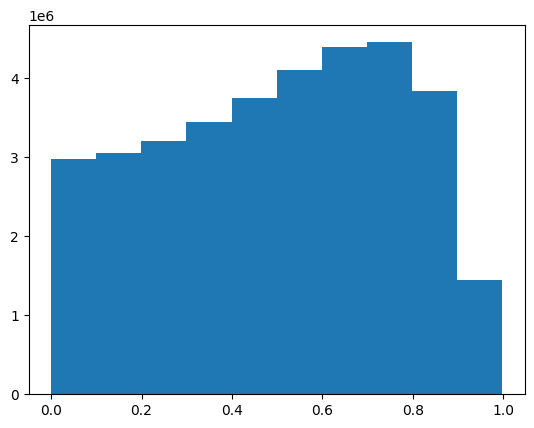

In [17]:
plt.hist(adjacency.flatten())

In [18]:
random_corr_coef = []
for i in range(100):
    shuffled_array = df_gene_expression.values
    [np.random.shuffle(x) for x in shuffled_array.T]
    shuffled_final_data_set = pd.DataFrame(data=shuffled_array)
    shuffle_corr_mat = shuffled_final_data_set.corr('pearson', numeric_only=True).to_numpy()
    np.fill_diagonal(shuffle_corr_mat, 0)
    assert(np.max(np.abs(shuffle_corr_mat)) < np.max(np.abs(corr_mat)))
    random_corr_coef.append(np.max(np.abs(shuffle_corr_mat)))
print(random_corr_coef)
ci_interval = st.t.interval(0.9, len(random_corr_coef)-1, 
                            loc=np.mean(random_corr_coef), 
                            scale=st.sem(random_corr_coef))
print(ci_interval)
cutoff = ci_interval[1]
print(cutoff)
adjacency[np.abs(adjacency)<=cutoff] = 0
adjacency[np.abs(adjacency)>cutoff] = 1
print(f"Superstructure contains {np.sum(adjacency)} edges which is \
        {np.sum(adjacency)/(adjacency.shape[1]**2)} fraction of all possible edges")


[0.9944567532589753, 0.9861252630900768, 0.9862635611556498, 0.9873099603487735, 0.9942179960285897, 0.9858078388446617, 0.9902170618826998, 0.98798731149634, 0.9925292374789358, 0.9944378288353329, 0.9844690686330064, 0.989773766160267, 0.9860883831409946, 0.9948637460351087, 0.9918836931691882, 0.9911162283142679, 0.987844974091079, 0.9942617073580645, 0.9852115912201302, 0.9832245915995103, 0.9898936382068441, 0.9938395930948988, 0.9849895279710027, 0.9896209623350298, 0.9894355921958191, 0.9864035712360669, 0.9900810577175498, 0.995129863870358, 0.9840369137606859, 0.9889182459471958, 0.987660070485612, 0.9970548208960464, 0.9938658787218805, 0.9883069001474964, 0.9913674005721309, 0.9845691850451075, 0.9847335000135757, 0.992103671769817, 0.9890636163266832, 0.9878036717061011, 0.9835892695381774, 0.9942842686376474, 0.9914905241741957, 0.9877466207262173, 0.9847841516090009, 0.9864992248062309, 0.9913389732909145, 0.9935567196074833, 0.9867575814829526, 0.993233291610883, 0.98804

In [ ]:
skeleton = [(i,j) for (i,j) in itertools.product(range(num_genes), range(num_genes)) if corr_mat[i,j] ==1]
genes = set()
for (i,j) in skeleton:
   print(df.columns[i])
   print(df.columns[j]) 
   
   genes.add(df.columns[i])
   genes.add(df.columns[j])
#print(len(genes), genes)

492 {'GBP4', 'KIF22', 'SLC38A10', 'MMRN1', 'CCNF', 'SULT1C4', 'CPTP', 'RPS8', 'SRSF11', 'STC1', 'KIF2C', 'RPS4X', 'TRA2B', 'EIF3L', 'TGFB2', 'SMS', 'CNTRL', 'CDH5', 'NEK3', 'RAF1', 'NUP88', 'LZTS2', 'ATP5MG', 'MARCHF6', 'SRSF7', 'EMILIN1', 'NMI', 'TUFM', 'RACK1', 'PLD1', 'BMP6', 'ZNF587', 'NEIL1', 'RSF1', 'FLI1', 'BUB3', 'FNTA', 'RPL18', 'MTR', 'EXOC7', 'MAGI1', 'TMEM185B', 'MCM7', 'DEAF1', 'MTHFD1', 'SFXN1', 'DLST', 'SMC2', 'SH3BP5', 'NCAPD2', 'MMADHC', 'SCD', 'KIF4A', 'FAM78A', 'LYRM1', 'DTYMK', 'CEP295', 'SELL', 'SLTM', 'PARP14', 'SERINC3', 'NFATC2IP', 'TPR', 'CDCA7L', 'RPL37A', 'LTA4H', 'ATIC', 'TCOF1', 'CAP1', 'MBD2', 'CNOT6L', 'NEK9', 'NORAD', 'ANKRD28', 'ACIN1', 'TM4SF18', 'SNX6', 'PRR11', 'FANCG', 'RFC3', 'GIMAP7', 'RPL32', 'GIMAP8', 'CENPF', 'MCM8', 'MEGF6', 'INO80C', 'MXD3', 'TAPBPL', 'CPNE2', 'BAIAP2-DT', 'SLC25A36', 'BUB1B', 'RPL6', 'RALGAPA2', 'PPIE', 'CCAR1', 'ARNT', 'TXN', 'RPL28', 'PDLIM5', 'HYAL2', 'LMNA', 'TPX2', 'HNRNPA1L2', 'SMC3', 'MELK', 'JDP2', 'RAN', 'LRIG3', 'R

### Prior knowledge

In [18]:
# df_A = pd.read_csv("./huvec/cd_matrix_dA.csv")
# df_B = pd.read_csv("./huvec/cd_matrix_dB.csv")
# df_C = pd.read_csv("./huvec/cd_matrix_dC.csv")
# df_D = pd.read_csv("./huvec/cd_matrix_dD.csv")
# df_E = pd.read_csv("./huvec/cd_matrix_dE.csv")

df_A = pd.read_csv("./rpe1/cd_tpm_matrix_dA.csv")
df_B = pd.read_csv("./rpe1/cd_tpm_matrix_dB.csv")
df_C = pd.read_csv("./rpe1/cd_tpm_matrix_dC.csv")
df_D = pd.read_csv("./rpe1/cd_tpm_matrix_dD.csv")
df_E = pd.read_csv("./rpe1/cd_tpm_matrix_dE.csv")

In [19]:
overlapping_genes = set(df_A.columns.values)
all_genes = set(df_A.columns.values)
print(len(overlapping_genes), len(all_genes))
for data in [df_B, df_C, df_D, df_E]:
    overlapping_genes = overlapping_genes.intersection(data.columns.values)
    all_genes = all_genes.union(data.columns.values)
    print(len(overlapping_genes), len(all_genes))

7596 7596
5635 8411
4527 8682
4159 9417
3906 9739


In [20]:
# import requests

# # Load STRING alias file
# alias_file = "./prior_knowledge/protein.info.v11.5.txt"
# alias_df = pd.read_csv(alias_file, sep="\t")

# # Create ENSG → Gene name dictionary
# ensp_to_gene = dict(zip(alias_df["#string_protein_id"], alias_df["preferred_name"]))

# # Load the PPI edge list
# ppi_file = "./prior_knowledge/9606.protein.physical.links.v11.5.txt"
# ppi_df = pd.read_csv(ppi_file, sep=" ")

# # Convert ENSG IDs to Gene Names
# ppi_df["protein1"] = ppi_df["protein1"].map(ensp_to_gene)
# ppi_df["protein2"] = ppi_df["protein2"].map(ensp_to_gene)

# # Find ENSG IDs that need fixing
# ensg_ids = set(ppi_df["protein1"]).union(set(ppi_df["protein2"]))
# ensg_ids = {x for x in ensg_ids if x.startswith("ENSG")}
# print(len(ensg_ids))

# # Function to convert ENSG → Gene Name using Ensembl API
# def ensg_to_gene(ensg_ids):
#     url = "https://rest.ensembl.org/lookup/id"
#     headers = {"Content-Type": "application/json"}
#     response = requests.post(url, headers=headers, json={"ids": list(ensg_ids)})
#     num_found = 0
#     if response.ok:
#         data = response.json()
#         ensg_to_gene_map = {}
#         for ensg in data:
#             if data[ensg] is not None:
#                 if data[ensg].get('display_name') is not None:
#                     ensg_to_gene_map[ensg] = data[ensg].get('display_name')
#                     num_found+=1
#         print(num_found)
#         return ensg_to_gene_map
#     else:
#         print("Error retrieving gene names:", response.text)
#         return {}

# # Convert ENSG → Gene Name
# ensg_to_gene_map = ensg_to_gene(ensg_ids)
# # Replace ENSG IDs with gene names
# ppi_df["protein1"] = ppi_df["protein1"].replace(ensg_to_gene_map)
# ppi_df["protein2"] = ppi_df["protein2"].replace(ensg_to_gene_map)

# # Drop links where we could not identify the gene name
# ensg_ids = set(ppi_df["protein1"]).union(set(ppi_df["protein2"]))
# ensg_ids = {x for x in ensg_ids if x.startswith("ENSG")}
# ppi_df = ppi_df.query("(protein1 not in @ensg_ids) and (protein2 not in @ensg_ids)")

# Save the final file with gene names
ppi_df = pd.read_csv("./prior_knowledge/string_ppi_gene_names.csv", header=0)


In [21]:
print(ppi_df)

        protein1 protein2  combined_score
0           ARF5     GPN1             156
1           ARF5    RPS17             177
2           ARF5     NET1             162
3           ARF5     BBS1             379
4           ARF5  LDHAL6B             287
...          ...      ...             ...
1963031    EIF3L   RPS27A             928
1963032    EIF3L    RPS11             925
1963033    EIF3L   EIF3CL             988
1963034    EIF3L     TOX3             152
1963035    EIF3L     TP53             270

[1963036 rows x 3 columns]


In [22]:
htf_file = "./prior_knowledge/tf-target-infomation.txt"
htf_df = pd.read_csv(htf_file, sep="\t")
print(htf_df)

              TF        target   tissue
0          AEBP2        TMEM53    colon
1          AEBP2      C1orf228    colon
2          AEBP2        FBXO31    colon
3          AEBP2      ADAMTSL5    colon
4          AEBP2   CTB-25B13.9    colon
...          ...           ...      ...
1342124  CCDC101          CLN3  unclear
1342125  CCDC101  RP11-666O2.1  unclear
1342126  CCDC101  RP11-666O2.2  unclear
1342127  CCDC101  RP11-666O2.4  unclear
1342128  CCDC101  RP11-666O2.5  unclear

[1342129 rows x 3 columns]


In [23]:
trrust_file = "./prior_knowledge/trrust.tsv"
trrust_df = pd.read_csv(trrust_file, sep="\t", header=None)
print(trrust_df)

          0       1           2                  3
0      AATF     BAX  Repression           22909821
1      AATF  CDKN1A     Unknown           17157788
2      AATF    KLK3     Unknown           23146908
3      AATF     MYC  Activation           20549547
4      AATF    TP53     Unknown           17157788
...     ...     ...         ...                ...
9391  ZNF76  CDKN1A  Repression           15280358
9392  ZNF76  PCYT1A  Activation           14702349
9393  ZNF76  TALDO1     Unknown           14702349
9394  ZNRD1   ABCB1  Activation           16373708
9395  ZNRD1    BCL2  Activation  16373708;16609701

[9396 rows x 4 columns]


In [24]:
string_undirected_edges = {(start, end) for start, end in zip(ppi_df["protein1"], ppi_df["protein2"])}
htf_edges = {edge for edge in zip(htf_df['TF'], htf_df['target'])}
trrust_edges = {edge for edge in zip(trrust_df[0], trrust_df[1])}
print(f"STRING contains {len(string_undirected_edges)} undirected edges, \
      HTF contains {len(htf_edges)} directed edges, \
      TRRUST contains {len(trrust_edges)} directed edges")
overlapping_edges = htf_edges.intersection(string_undirected_edges)
print(f"STRING and HTF overlap over {len(overlapping_edges)} edges, \
    {100* len(overlapping_edges)/max((len(string_undirected_edges), len(htf_edges)))} %")

STRING contains 1959329 undirected edges,       HTF contains 1319123 directed edges,       TRRUST contains 8427 directed edges
STRING and HTF overlap over 16426 edges,     0.838348230440115 %


In [25]:
proteins = {p for p in set(ppi_df["protein1"]).union(set(ppi_df["protein2"]))}
htf_tf = {tf for tf in htf_df['TF']}
trrust_tf = {tf for tf in trrust_df[0]}
print(f"STRING contains interactions over {len(proteins)} proteins, \
      HTF has interactions over {len(htf_tf)} TFs, \
      TRRUST has interactions over {len(trrust_tf)} TFs")
overlapping_tf = proteins.intersection(htf_tf)
print(f"STRING and HTF overlap over {len(overlapping_tf)} TF/proteins, \
    {100*len(overlapping_tf)/ len(htf_tf)} %")

STRING contains interactions over 18207 proteins,       HTF has interactions over 495 TFs,       TRRUST has interactions over 795 TFs
STRING and HTF overlap over 492 TF/proteins,     99.39393939393939 %


In [26]:
hubs = ["TP53", "MYC", "FOS"]
for h in hubs:
    print(f"{h} in TFs {h in overlapping_tf}")
    print(f"{h} in genes {h in all_genes}")

TP53 in TFs True
TP53 in genes True
MYC in TFs True
MYC in genes True
FOS in TFs True
FOS in genes True


In [27]:
radbio_file = "./prior_knowledge/radiation_edges.txt"
radbio_df = pd.read_csv(radbio_file)
print(radbio_df.head())

   node1    node2                                          citation
0  DNAPK     TP53  https://pmc.ncbi.nlm.nih.gov/articles/PMC9319710
1   TP53   CDKN1A  https://pmc.ncbi.nlm.nih.gov/articles/PMC9319710
2   TP53  GADD45A  https://pmc.ncbi.nlm.nih.gov/articles/PMC9319710
3   TP53      p21  https://pmc.ncbi.nlm.nih.gov/articles/PMC9319710
4   MDM2     MDM2  https://pmc.ncbi.nlm.nih.gov/articles/PMC9319710


In [28]:
radbio_edges = {edge for edge in zip(radbio_df['node1'], radbio_df['node2'])}
print(f"Curated radiation database contains {len(radbio_edges)} directed edges")
overlapping_edges = radbio_edges.intersection(string_undirected_edges)
print(f"STRING and Radbio overlap over {len(overlapping_edges)} edges, \
    {100* len(overlapping_edges)/max((len(string_undirected_edges), len(radbio_edges)))} %")
overlapping_edges = radbio_edges.intersection(htf_edges)
print(f"HTF and Radbio overlap over {len(overlapping_edges)} edges, \
    {100* len(overlapping_edges)/max((len(htf_edges), len(radbio_edges)))} %")
overlapping_edges = radbio_edges.intersection(trrust_edges)
print(f"TRRUST and Radbio overlap over {len(overlapping_edges)} edges, \
    {100* len(overlapping_edges)/max((len(trrust_edges), len(radbio_edges)))} %")

Curated radiation database contains 35 directed edges
STRING and Radbio overlap over 8 edges,     0.0004083030466042201 %
HTF and Radbio overlap over 3 edges,     0.00022742382628458452 %
TRRUST and Radbio overlap over 5 edges,     0.05933309600094933 %


### Key Genes

In [29]:
important_genes = pd.read_csv("./prior_knowledge/radiation_genes.txt", sep=' ', header=None)
important_genes = important_genes.iloc[:,0]
print(important_genes.shape)

(56,)


In [30]:
# How many of the identified genes are in our data set
important_genes_in_dataset = [g for g in important_genes if g in all_genes]
print(f"{len(important_genes_in_dataset)} out of {len(important_genes)} of important genes are DE genes in dataset")
# Find the sub-networks for STRING, TRRUST and htfTarget over this gene set
string_important_edges = []
trrust_important_edges = []
htf_important_edges = []
for g in important_genes_in_dataset:
    s = [edge for edge in string_undirected_edges if (g == edge[0]) or (g == edge[1])]
    t = [edge for edge in trrust_edges if (g == edge[0]) or (g == edge[1])]
    h = [edge for edge in htf_edges if (g == edge[0]) or (g == edge[1])]
    s = [keep for keep in s if (keep[0] in all_genes) and keep[1] in all_genes]
    t = [keep for keep in t if (keep[0] in all_genes) and keep[1] in all_genes]
    h = [keep for keep in h if (keep[0] in all_genes) and keep[1] in all_genes]

    string_important_edges += s
    trrust_important_edges += t
    htf_important_edges += h
string_important_edges = set(string_important_edges)
trrust_important_edges = set(trrust_important_edges)
htf_important_edges = set(htf_important_edges)
print(f"STRING subnetwork over important genes has {len(string_important_edges)} edges")
print(f"TRRUST subnetwork over important genes has {len(trrust_important_edges)} edges")
print(f"HTF subnetwork over important genes has {len(htf_important_edges)} edges")


42 out of 56 of important genes are DE genes in dataset
STRING subnetwork over important genes has 11982 edges
TRRUST subnetwork over important genes has 946 edges
HTF subnetwork over important genes has 24997 edges


In [31]:
import networkx as nx

string_sub_net = nx.Graph()
string_sub_net.add_edges_from(string_important_edges)
print(len(string_sub_net.nodes))

trrust_sub_net = nx.DiGraph()
trrust_sub_net.add_edges_from(trrust_important_edges)
print(len(trrust_sub_net.nodes))

htf_sub_net = nx.DiGraph()
htf_sub_net.add_edges_from(htf_important_edges)
print(len(htf_sub_net.nodes))


2875
510
8163


In [32]:
def get_subnetwork(important_genes, de_genes):
    # How many of the identified genes are in our data set
    important_genes_in_dataset = [g for g in important_genes if g in de_genes]
    # Find the sub-networks for STRING, TRRUST and htfTarget over this gene set
    string_important_edges = []
    trrust_important_edges = []
    htf_important_edges = []
    for g in important_genes_in_dataset:
        s = [edge for edge in string_undirected_edges if (g == edge[0]) or (g == edge[1])]
        t = [edge for edge in trrust_edges if (g == edge[0]) or (g == edge[1])]
        h = [edge for edge in htf_edges if (g == edge[0]) or (g == edge[1])]
        s = [keep for keep in s if (keep[0] in de_genes) and keep[1] in de_genes]
        t = [keep for keep in t if (keep[0] in de_genes) and keep[1] in de_genes]
        h = [keep for keep in h if (keep[0] in de_genes) and keep[1] in de_genes]

        string_important_edges += s
        trrust_important_edges += t
        htf_important_edges += h
    string_important_edges = set(string_important_edges)
    trrust_important_edges = set(trrust_important_edges)
    htf_important_edges = set(htf_important_edges)
    subnet = nx.DiGraph()
    subnet.add_edges_from(string_important_edges)
    subnet.add_edges_from(trrust_important_edges)
    subnet.add_edges_from(htf_important_edges)
    return subnet

In [37]:
import pickle
from cd_v_partition.vis_partition import create_partition_plot
datasets = ['A', 'B', 'C', 'D', 'E']
top_n = 10
for dose, data in zip(datasets, [df_A, df_B, df_C, df_D, df_E]):
    G = get_subnetwork(important_genes[0:top_n], list(data.columns))
    TFs = [node for node in G.nodes if G.degree(node) > 50]
    handcraft_partition = {}
    for i in range(len(TFs)):
        print([(node,G.degree(node)) for node in G.neighbors(TFs[i])])
        subnet = get_subnetwork([TFs[i]], list(data.columns))
        if len(subnet.nodes)>0:
            print( TFs[i],TFs[i] in important_genes.values, len(subnet.nodes), len(subnet.edges))
            handcraft_partition[i] = list(subnet.nodes)
    print(len(handcraft_partition))
    causal_partition = dict()
    for idx, c in enumerate(list(handcraft_partition.values())):
        c_new = [node for node in c if node not in TFs] # remove TFs from subset so we don't get huge partitions. 
        tf_new = [node for node in c if node in TFs]
        outer_node_boundary = nx.node_boundary(G, c_new)
        expanded_cluster = set(c).union(outer_node_boundary).union(tf_new)
        causal_partition[idx] = list(expanded_cluster)
        print(len(outer_node_boundary), len(expanded_cluster))
    # print(causal_partition)
    with open(f"./rpe1/cd_partition_d{dose}_new.pickle", "wb") as file:
        pickle.dump(causal_partition, file)
    causal_partition_by_node = {}
    for idx, c in causal_partition.items():
        for node in c:
            causal_partition_by_node[node] = idx
    nx.set_node_attributes(G, causal_partition_by_node, name='partition') 
    nx.write_gexf(G, f"./rpe1/cd_subgraph_d{dose}.gexf")
    # Min-max normalization for determining size 
    degrees = np.array([G.degree(node) for node in G.nodes])
    min_deg, max_deg = degrees.min(), degrees.max()
    sizes = 10 + (degrees - min_deg) / (max_deg - min_deg) * (10 - 1)
    #create_partition_plot(G, G.nodes, causal_partition, f"./huvec/cd_subgraph_d{dose}.png", node_size=dict(zip(G.nodes, sizes)))
    
    


[('RBL1', 7), ('ANKRD11', 4), ('JMJD6', 2), ('FRAS1', 2), ('ANXA1', 3), ('MAGED2', 2), ('TP73', 10), ('TBC1D31', 2), ('PPP1CC', 4), ('E2F1', 13), ('ZNF668', 5), ('ATG7', 2), ('PLAU', 5), ('RAD54B', 4), ('ASH2L', 4), ('PPID', 4), ('PTS', 2), ('TRIM8', 4), ('JUN', 11), ('PRDX1', 4), ('RPL4', 3), ('FGF1', 2), ('HIPK1', 3), ('TOP2A', 4), ('WASF2', 3), ('DDIT4', 5), ('KPNB1', 4), ('NOS1AP', 2), ('ZFHX3', 3), ('TSC22D1', 3), ('PPP2R5C', 3), ('NUP88', 2), ('SPP1', 2), ('SMAD1', 2), ('TPR', 2), ('ERBB4', 2), ('FANCC', 2), ('CCNB1', 10), ('HUWE1', 4), ('HDAC4', 7), ('PTK2B', 7), ('USO1', 2), ('ID1', 3), ('CDK4', 7), ('SDC1', 2), ('SP3', 4), ('PTBP3', 2), ('PRKAA1', 3), ('ADAM12', 2), ('HDAC5', 4), ('DPP4', 2), ('TAGLN', 2), ('TRRAP', 6), ('MPDZ', 2), ('BAG2', 3), ('BCL2', 296), ('NFIX', 6), ('IRS1', 4), ('SMC4', 2), ('SIN3A', 6), ('PTTG1', 4), ('PTK2', 4), ('GSTP1', 4), ('CUL4B', 4), ('SNRPB', 2), ('SUB1', 2), ('ZEB1', 7), ('HDAC6', 8), ('TRAF1', 4), ('RPS6KA2', 5), ('RNF20', 4), ('PTTG1IP', 2)

In [35]:
dose="A"
with open(f"./rpe1/cd_partition_d{dose}_new.pickle", "rb") as file:
    causal_partition = pickle.load(file)
subsets = [set(comm) for comm in causal_partition.values()]
for i, s in enumerate(subsets):
    for m in subsets[i+1:]:
        print(s.intersection(m))

{'BCOR', 'RECQL4', 'SIN3A', 'PLK1', 'ELAVL1', 'ETS2', 'RPL23', 'VCP', 'STK4', 'MAZ', 'FOXM1', 'FOXK2', 'B2M', 'UBA1', 'BAG2', 'SP1', 'MDM4', 'JUND', 'JUN', 'TOP1', 'TDG', 'BCL3', 'SMC3', 'CABIN1', 'CFLAR', 'PTK2B', 'PARP1', 'MUC1', 'MAPK7', 'CAV1', 'HSP90AA1', 'HIC1', 'KDM4A', 'CALR', 'TRIM65', 'SMARCA5', 'KLF5', 'UCP2', 'CHUK', 'KMT2D', 'SMAD3', 'MAP4', 'TP53BP1', 'SF3A3', 'ZNF668', 'UBE2I', 'IFI16', 'ATF3', 'RASSF1', 'MEN1', 'SLC2A1', 'CDK2', 'UBB', 'SMAD7', 'NONO', 'TERT', 'G3BP1', 'PIN1', 'RRM2', 'DDX3X', 'TRIM28', 'MAPK1', 'PGPEP1', 'KLF9', 'MGST1', 'TUBA4A', 'CDK4', 'HMGA1', 'MYBL2', 'SKP2', 'NCOR2', 'BRD4', 'HDAC3', 'CTBP1', 'AGO2', 'STAT3', 'ARRB1', 'UBC', 'PHB2', 'RBL1', 'PPP1R15A', 'CDK6', 'MATR3', 'EEF1A1', 'CCNA2', 'TCHP', 'KPNA2', 'BCL6', 'E2F3', 'HNRNPC', 'SYVN1', 'NFKBIA', 'ACTR10', 'CDK1', 'PDIA3', 'PRDX1', 'TRIM32', 'ELF4', 'HEXIM1', 'PRKCD', 'DNAJB1', 'EP300', 'STUB1', 'BUB3', 'PDLIM7', 'CSNK1D', 'E2F1', 'EP400', 'VDR', 'CCND1', 'BRD7', 'KDM6B', 'BECN1', 'PSMC3', 'RUN

In [20]:
reg_tfs = htf_tf.union(trrust_tf)
print(len(reg_tfs))
human_tfs = pd.read_csv("./BEELINE/human-tfs.csv").iloc[:,0].values
tfs = reg_tfs.union(set(human_tfs))
print(len(tfs))
print(len(reg_tfs.intersection(set(human_tfs))))

970
1662
871


In [ ]:
import os
path = "./huvec/GENELink_data_files"
if not os.path.exists(path):
    os.makedirs(path)
doses = ['A', 'B', 'C', 'D', 'E']
top_n = 10

for dose in doses:
    expression_data = pd.read_csv(f"./huvec/GENELink_data_files/GeneExpression_d{dose}.csv", header=0)
    G = get_subnetwork(important_genes[0:top_n], list(expression_data.columns))
    expression_sub_data = expression_data[list(G.nodes)]
    print(expression_sub_data.shape)
    expression_sub_data.to_csv(f"./huvec/GENELink_data_files/GeneExpression_key_genes_{dose}.csv")
    
    genes_by_dose = list(expression_sub_data.columns)
    tfs_by_dose = tfs.intersection(expression_sub_data.columns)
    tf_index = [genes_by_dose.index(i) for i in tfs_by_dose]
    print(tfs_by_dose)
    
    tfs_by_dose = pd.DataFrame(data=np.column_stack([list(tfs_by_dose), tf_index]))
    tfs_by_dose.columns = ["Gene", "index"]
    tfs_by_dose.to_csv(f"{path}/TF_{dose}.csv", index=True)
    
    targets_by_dose = [[i, genes_by_dose.index(i)] for i in G.nodes]
    targets_by_dose = pd.DataFrame(data=targets_by_dose)
    targets_by_dose.columns = ["Gene", "index"]
    targets_by_dose.to_csv(f"{path}/Target_{dose}.csv", index=True)
    
    edges_by_dose = [[genes_by_dose.index(start), genes_by_dose.index(end)] for start, end in list(G.edges)]
    edges_by_dose = pd.DataFrame(data=edges_by_dose)
    edges_by_dose.columns = ["TF", "Target"]
    edges_by_dose.to_csv(f"{path}/Label_{dose}.csv", index=True)
    

{'PITX1', 'MEF2C', 'PRKCA', 'RBBP7', 'BRIP1', 'HOXD1', 'TCFL5', 'PLAG1', 'DEDD2', 'TAL1', 'PPARGC1B', 'CITED2', 'PPARA', 'HLX', 'CREB5', 'KLF4', 'HOXB4', 'ZNF467', 'TGFB1', 'VHL', 'KDM1A', 'RXRA', 'ATF7', 'UPF1', 'ESRRA', 'SMAD3', 'SP110', 'NMI', 'TRIB3', 'EIF2AK2', 'NRIP1', 'EGR1', 'SMARCA5', 'PRPF4B', 'REST', 'ZBTB2', 'SMC1A', 'BAZ1B', 'SAFB', 'ETS2', 'ANKZF1', 'MAZ', 'TSC22D3', 'CTDSPL', 'SRSF6', 'TEAD3', 'NCOA2', 'PDLIM1', 'RUNX1T1', 'CTR9', 'TLE3', 'DAZAP2', 'DAB2', 'SIX5', 'TOX2', 'SMC3', 'ZNF136', 'KLF10', 'CHD7', 'TARDBP', 'RFXANK', 'ICE2', 'SMAD1', 'SAP30', 'GLI3', 'HCLS1', 'BMP6', 'MED15', 'WWTR1', 'ZNF473', 'MTA2', 'MCM7', 'CHD4', 'FOXJ3', 'TCF4', 'BCLAF1', 'KDM5A', 'SATB1', 'KMT2B', 'NR1D2', 'ELL2', 'HNRNPUL1', 'GLYR1', 'DEAF1', 'DOT1L', 'ELF1', 'HNRNPD', 'FOSL1', 'HEY1', 'MYC', 'ZNF267', 'PPARD', 'KLF2', 'MYBL1', 'NUPR1', 'JMJD6', 'ELK4', 'TAF12', 'ABL1', 'ZHX2', 'E2F3', 'ZMYM2', 'NCOA4', 'MECP2', 'NPM1', 'SMARCA2', 'DRAP1', 'ATF7IP', 'THRA', 'HIF3A', 'LMO2', 'SCD5', 'CDCA